In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [45]:
df = pd.read_csv('termdeposit_train.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


# Variables in dataset

In [46]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [47]:
df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [48]:
df.shape

(31647, 18)

In [49]:
print(f"The rows and columns in the data set:{df.shape}")
print(f"the column headers in the dataset:{df.columns}")

The rows and columns in the data set:(31647, 18)
the column headers in the dataset:Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')


# Data Exploration

In [50]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [53]:
# For further analysis of the data we will drop few unnecessary variable

In [54]:
df.drop(['duration','contact','month','day','default','pdays'],axis=1,inplace=True)

In [55]:
df.head()

,ID,age,job,marital,education,balance,housing,loan,campaign,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,1933,no,no,2,0,unknown,no
1,40576,31,unknown,married,secondary,3,no,no,2,0,unknown,no
2,15320,27,services,married,secondary,891,yes,no,1,0,unknown,no
3,43962,57,management,divorced,tertiary,3287,no,no,1,3,success,yes
4,29842,31,technician,married,secondary,119,yes,no,1,0,unknown,no


In [56]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
balance       0
housing       0
loan          0
campaign      0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [74]:
df.replace(['basic.6y','basic.4y','basic.9y'],'basic',inplace=True)

# Visualizing the Data

<AxesSubplot:>

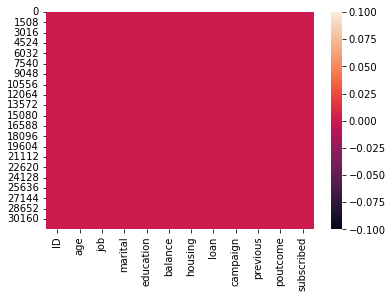

In [75]:
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='age', ylabel='count'>

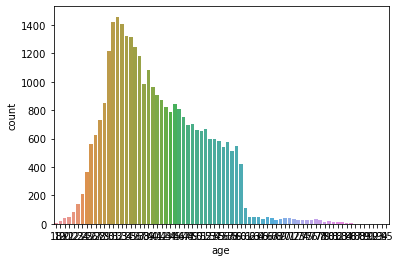

In [76]:
sns.countplot(x='age', data=df)

<AxesSubplot:xlabel='count', ylabel='job'>

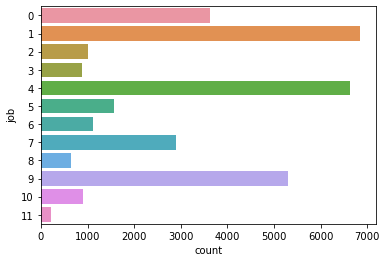

In [77]:
sns.countplot(y='job', data=df)

<AxesSubplot:xlabel='marital', ylabel='count'>

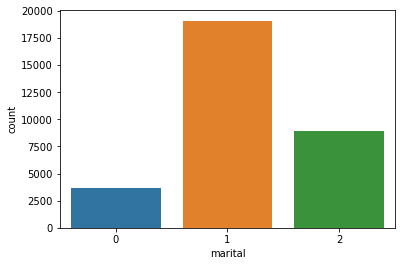

In [78]:
sns.countplot(x='marital', data=df)

In [79]:
df.education.value_counts()

1    16224
2     9301
0     4808
3     1314
Name: education, dtype: int64

<AxesSubplot:xlabel='count', ylabel='education'>

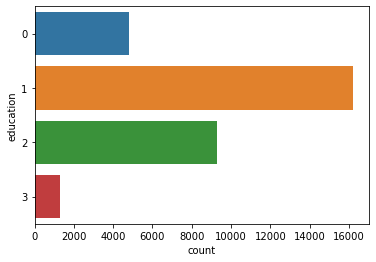

In [80]:
sns.countplot(y='education', data=df)

In [72]:
df.head()

,ID,age,job,marital,education,balance,housing,loan,campaign,previous,poutcome,subscribed
0,26110,56,0,1,3,1933,0,no,2,0,3,no
1,40576,31,11,1,1,3,0,no,2,0,3,no
2,15320,27,7,1,1,891,0,no,1,0,3,no
3,43962,57,4,0,2,3287,0,no,1,3,2,yes
4,29842,31,9,1,1,119,0,no,1,0,3,no


<AxesSubplot:>

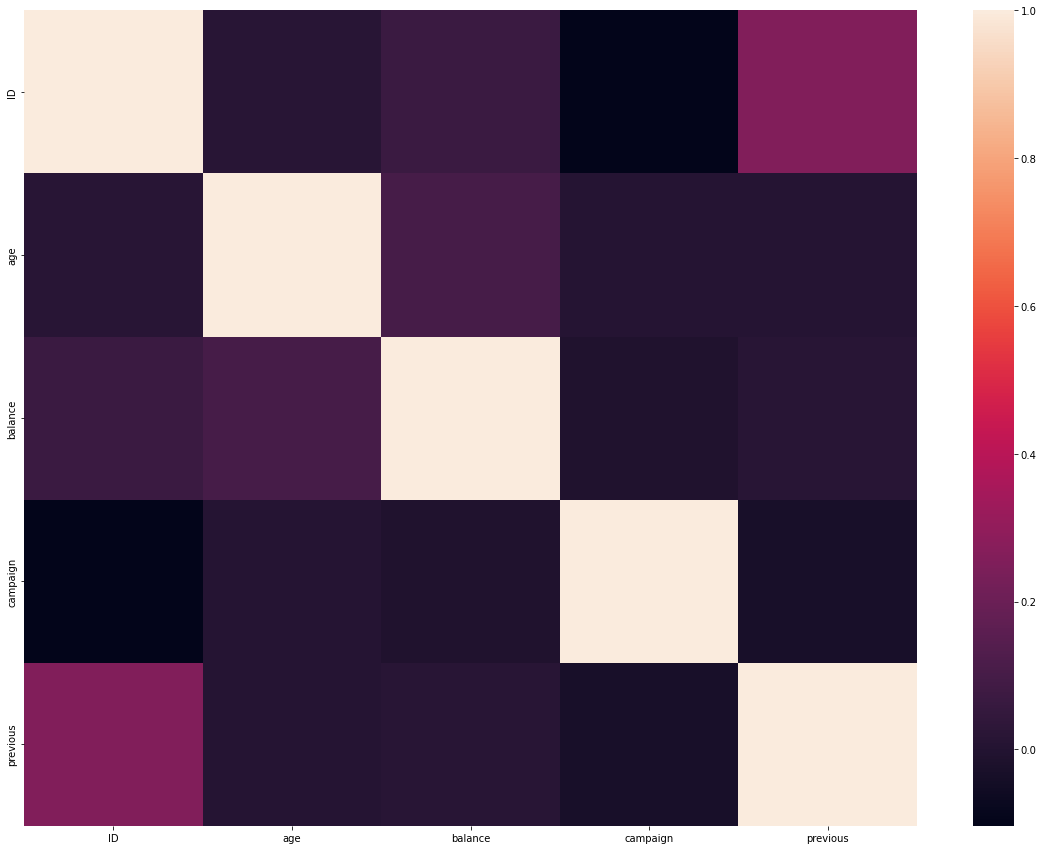

In [64]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr())

# Pre Processing

In [65]:
le = preprocessing.LabelEncoder()

In [66]:
df.job = le.fit_transform(df.job)

In [67]:
df.marital = le.fit_transform(df.marital)
df.education = le.fit_transform(df.education)
df.housing = le.fit_transform(df.loan)
df.poutcome = le.fit_transform(df.poutcome)

In [68]:
df.head()

,ID,age,job,marital,education,balance,housing,loan,campaign,previous,poutcome,subscribed
0,26110,56,0,1,3,1933,0,no,2,0,3,no
1,40576,31,11,1,1,3,0,no,2,0,3,no
2,15320,27,7,1,1,891,0,no,1,0,3,no
3,43962,57,4,0,2,3287,0,no,1,3,2,yes
4,29842,31,9,1,1,119,0,no,1,0,3,no


In [69]:
df.shape

(31647, 12)

In [70]:
x =df.iloc[:,0:14]
x[0:10]

,ID,age,job,marital,education,balance,housing,loan,campaign,previous,poutcome,subscribed
0,26110,56,0,1,3,1933,0,no,2,0,3,no
1,40576,31,11,1,1,3,0,no,2,0,3,no
2,15320,27,7,1,1,891,0,no,1,0,3,no
3,43962,57,4,0,2,3287,0,no,1,3,2,yes
4,29842,31,9,1,1,119,0,no,1,0,3,no
5,29390,33,4,2,2,0,0,no,3,0,3,no
6,40444,56,5,1,1,1044,0,no,2,0,3,yes
7,40194,50,9,2,1,1811,0,no,4,0,3,no
8,29824,45,1,0,1,1951,0,no,1,0,3,no
9,44676,35,0,1,1,1204,0,no,2,0,3,no


In [81]:
y = df.iloc[:,14]
y[0:10]

IndexError: single positional indexer is out-of-bounds